In [1]:
!pip install diffusers

In [2]:
!pip install xformers -q

In [3]:
!pip install accelerate

In [4]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True, low_cpu_mem_usage=False
)
pipeline.enable_model_cpu_offload()

pipeline.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settin

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

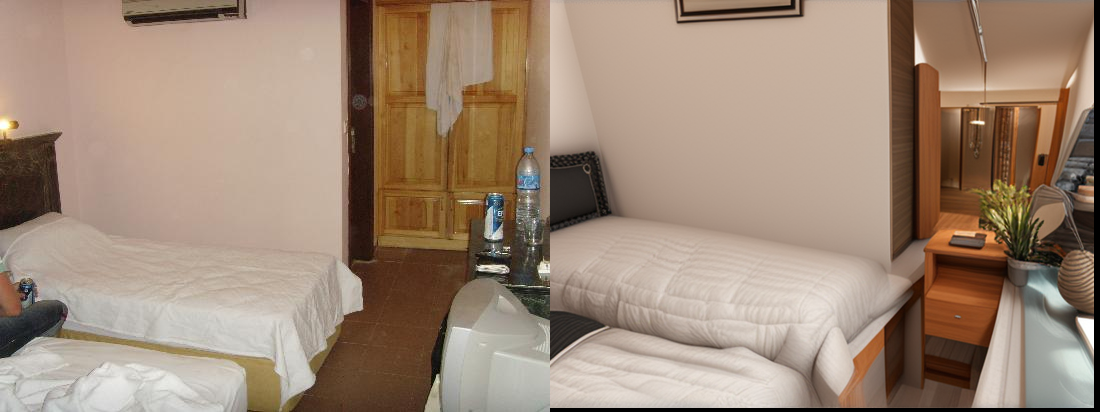

In [5]:
url = "/content/room-sorry-bad-quality.jpg"
init_image = load_image(url)

prompt = "Make room clean and tidy, don't add additional things, just let the image it as it is, detailed, 8k"

image = pipeline(prompt, image=init_image, strength=0.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

  0%|          | 0/25 [00:00<?, ?it/s]

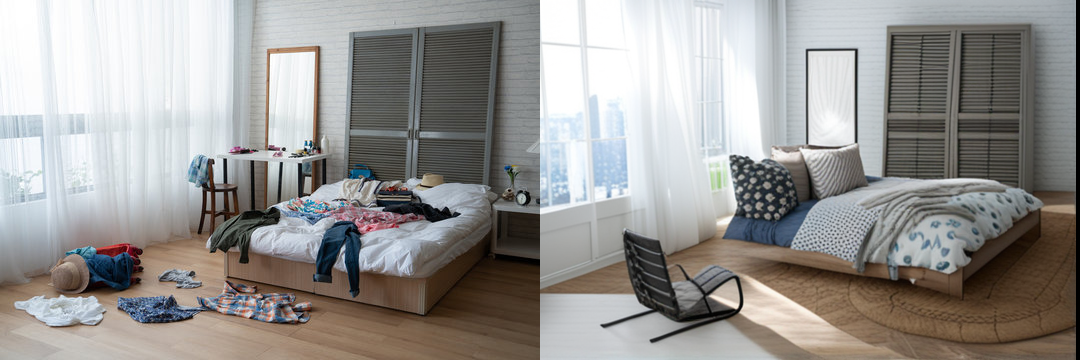

In [6]:
url = "https://t4.ftcdn.net/jpg/02/56/20/13/360_F_256201353_cl925V1nGNPwkNAEq0APgAevUymgaZh3.jpg"
init_image = load_image(url)

prompt = "Make room clean and tidy, don't add additional things, just let the image it as it is, detailed, 8k"

image = pipeline(prompt, image=init_image, strength=0.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

In [7]:
!pip install cloudinary

In [8]:
import cloudinary
import cloudinary.uploader

In [9]:
cloudinary.config(
    cloud_name="dcwwcwkvu",
    api_key="363672271215785",
    api_secret="Oba71bEe-7fmwIgjugIe3qDZsDY"
)
def upload_to_cloudinary(image_path):
    try:
        # Upload image to Cloudinary
        upload_result = cloudinary.uploader.upload(image_path)

        # Access the URL of the uploaded image
        image_url = upload_result["url"]

        return image_url
    except Exception as e:
        print(f"Error uploading image to Cloudinary: {e}")
        return None

In [10]:
!pip install gradio_client transformers pyngrok fastapi[all] nest_asyncio -q
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok
!ngrok authtoken 2NqtkyBMF0KF99ofEU1fGz1pCJS_3XehxpoU47JGBiqY6tV7M

from fastapi import FastAPI, UploadFile, File
from fastapi.middleware.cors import CORSMiddleware
import os
from pyngrok import ngrok
import nest_asyncio
import uvicorn
port=8888
app = FastAPI()
app.add_middleware(
CORSMiddleware,
allow_origins=["*"],
allow_credentials=True,
allow_methods=["*"],
allow_headers=["*"],
)

deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 https://ngrok-agent.s3.amazonaws.com buster InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 110 kB in 3s (44.0 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
40 packages 

In [11]:
from tempfile import NamedTemporaryFile

In [12]:
# from fastapi.responses import Response, FileResponse
# @app.post("/predictor/")
# async def predict(file: UploadFile = File(...)):

#   with NamedTemporaryFile(delete=False) as temp_file:
#     temp_file.write(await file.read())
#     temp_file_path = temp_file.name

#   url = temp_file_path
#   init_image = load_image(url)
#   prompt = "Make room clean and tidy, don't add additional things, just let the image it as it is, detailed, 8k"
#   image = pipeline(prompt, image=init_image, strength=0.5).images[0]
#   os.remove(temp_file_path)
#   image.save("temp.jpg")
#   return FileResponse("temp.jpg")

In [13]:
from fastapi.responses import Response, FileResponse
from fastapi.responses import JSONResponse
import uuid
@app.post("/predictor/")
async def predict(file: UploadFile = File(...)):

  with NamedTemporaryFile(delete=False) as temp_file:
    temp_file.write(await file.read())
    temp_file_path = temp_file.name

  prompt = "Make room clean and tidy, don't add additional things, just let the image it as it is, detailed, 8k"
  init_image = load_image(temp_file_path)
  image = pipeline(prompt, image=init_image, strength=0.5).images[0]
  path = f'temp{uuid.uuid1()}.jpg'

  os.remove(temp_file_path)
  image.save(path)
  uploaded_url = upload_to_cloudinary(path)
  if uploaded_url:
        return JSONResponse(content={"image_url": uploaded_url}, status_code=200)
  else:
        return JSONResponse(content={"error": "Failed to upload image"}, status_code=500)

In [ ]:
if __name__=="__main__":
    ngrok_tunnel = ngrok.connect(port)
    print('Public URL:', ngrok_tunnel.public_url)
    nest_asyncio.apply()
    uvicorn.run(app,port=port)

INFO:     Started server process [5321]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8888 (Press CTRL+C to quit)


Public URL: https://f69f-34-125-39-153.ngrok-free.app
INFO:     2401:4900:5706:f929:f096:2ee0:1209:8b81:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     2401:4900:5706:f929:f096:2ee0:1209:8b81:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     2401:4900:5706:f929:f096:2ee0:1209:8b81:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2401:4900:5706:f929:f096:2ee0:1209:8b81:0 - "GET /openapi.json HTTP/1.1" 200 OK


  0%|          | 0/25 [00:00<?, ?it/s]

INFO:     2401:4900:5706:f929:f096:2ee0:1209:8b81:0 - "POST /predictor/ HTTP/1.1" 200 OK
INFO:     2401:4900:198e:28ea:1:2:de79:95b0:0 - "GET /predictor/ HTTP/1.1" 405 Method Not Allowed


  0%|          | 0/25 [00:00<?, ?it/s]

INFO:     2409:4040:d01:6baf:1dcc:1054:ff66:fa01:0 - "POST /predictor/ HTTP/1.1" 200 OK
